In [1]:
# importing dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape # the shape of data

(8693, 14)

In [7]:
df.info() # have some informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [44]:
df.isna().sum() # chech the % of missing values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [12]:
df.drop('Name',inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


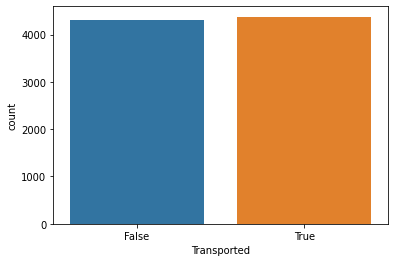

In [14]:
sns.countplot(df.Transported)
plt.show() # not unbalanced date

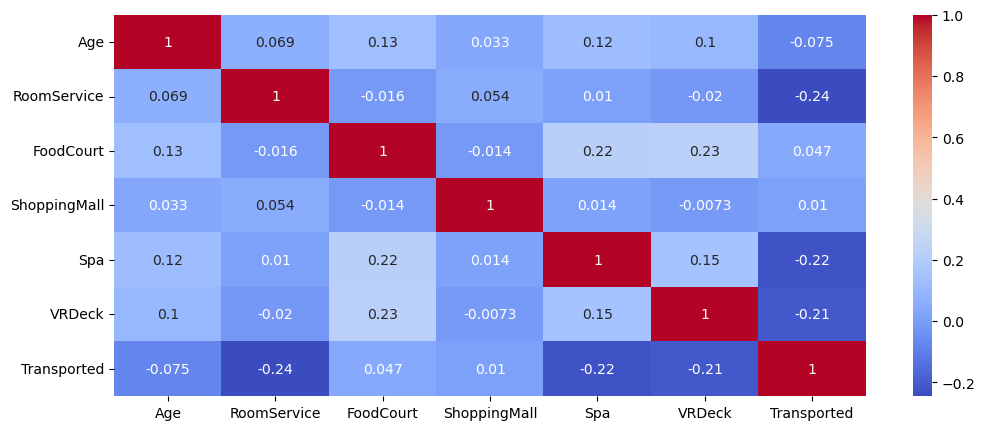

In [23]:
fig,ax=plt.subplots(figsize=(12,5),dpi=101)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',ax=ax) # check the correlation

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


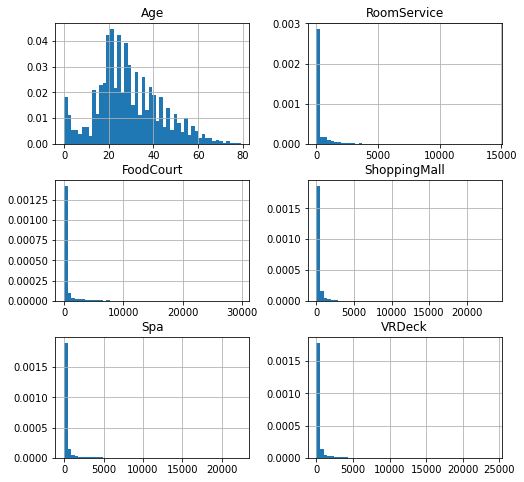

In [32]:
df.hist(bins=50,density=True,figsize=(8,8)) # chech the distribution
plt.show()

In [33]:
df.select_dtypes(include='object').columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'VIP'],
      dtype='object')

In [47]:
# Earth the most frequent
# fill the missing values by th most frequent for Homeplanet
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [112]:
# number of missing is not important if we fill it by the most frequent f
# fill the missing values by th most frequent Cryosleep
print(df.CryoSleep.value_counts())

False    5439
True     3037
Name: CryoSleep, dtype: int64


In [80]:
#fill nan by the most frequent
df.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [91]:
# fill nan by most frequent
df.VIP.value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [115]:
# for to split the cabin and ckeck and "S" and 'F' MORIRUTY
TempCabin=df.Cabin.str.split('/',expand=True)
TempCabin.columns=['deck','num','side'] 
TempCabin.side.value_counts()

S    4288
P    4206
Name: side, dtype: int64

In [42]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [116]:
def split_cabin(x):
  if len(str(x).split('/')) < 3:
    return ['F', 'Missing', "S"]
  else:   
    return str(x).split('/')

In [225]:
# preprocessing the date by a fonction
def preprocessing(df): 
  # Fill missing the category with the most frequent
  df['HomePlanet'].fillna('Earth', inplace=True)
  df['CryoSleep'].fillna('False', inplace=True)
  df['Destination'].fillna('TRAPPIST-1e', inplace=True)
  df['VIP'].fillna('False', inplace=True)
  # Cabin preprocessing - extract Deck and Side only
  df['TempCabin'] = df['Cabin'].apply(lambda x: split_cabin(x))
  df['Deck'] = df['TempCabin'].apply(lambda x: x[0])
  df['Side'] = df['TempCabin'].apply(lambda x: x[2])
  df.drop(['TempCabin', 'Cabin'], axis=1, inplace=True)  
  # Age 
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  # Monetary spending columns replace wiht by using the plot_distribution
  df['ShoppingMall'].fillna(0, inplace=True)
  df['Spa'].fillna(0, inplace=True)
  df['VRDeck'].fillna(0, inplace=True)
  df['RoomService'].fillna(0, inplace=True)
  df['FoodCourt'].fillna(0, inplace=True) 


In [226]:
# make a copy
df1=df.copy()

In [227]:
preprocessing(df1)

In [228]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   object 
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [229]:
df1.isna().sum().sum() # no missing value

0

In [230]:
df1.index=df.PassengerId

In [231]:

X=df1.drop(['Transported','PassengerId'],axis=1)
y=df1.Transported

In [232]:
# make encode
X=pd.get_dummies(X,drop_first=True)

In [233]:
X.shape,X.shape

((8693, 22), (8693, 22))

In [234]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,CryoSleep_False,...,VIP_True,VIP_False,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0004_01,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [235]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [236]:

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNet


In [237]:
scaler=StandardScaler().fit(X_train)

In [238]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_test.shape,X_train.shape

((2608, 22), (6085, 22))

In [239]:
forest=RandomForestClassifier(random_state=42)

In [240]:
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [257]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,precision_score

In [242]:
# check the score of the model in the test
pred=forest.predict(X_test)

In [258]:
accuracy_score(y_test,pred),precision_score(y_test,pred)

(0.7917944785276073, 0.8083735909822867)

In [244]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.78      0.82      0.80      1299
        True       0.81      0.77      0.79      1309

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



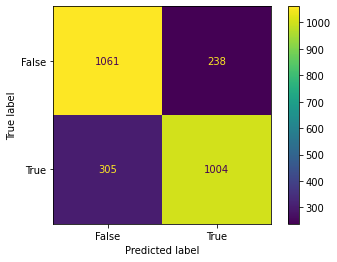

In [245]:
ConfusionMatrixDisplay.from_estimator(forest,X_test,y_test)

In [246]:
# make the second elastic
grid={'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],'l1_ratio':[0, 1, 0.01]}
grid_el=GridSearchCV(ElasticNet(random_state=101),param_grid=grid,cv=5,n_jobs=-1,scoring='neg_mean_absolute_error')

In [247]:
# fit the model
grid_el.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.903e+02, tolerance: 1.521e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

GridSearchCV(cv=5, estimator=ElasticNet(random_state=101), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0,
                                   10.0, 100.0],
                         'l1_ratio': [0, 1, 0.01]},
             scoring='neg_mean_absolute_error')

In [248]:
grid_el.best_estimator_

ElasticNet(alpha=0.0, l1_ratio=0, random_state=101)

In [264]:
pred2=grid_el.predict(X_test).round()

array([1., 0., 0., ..., 0., 0., 0.])

In [266]:
# check the score
accuracy_score(y_test,grid_el.predict(X_test).round(),normalize=True)

0.7703220858895705

In [251]:
## the firh model SVM
param_grid = {'gamma': [1,0.1,'scale'],'kernel': ['rbf', 'sigmoid']}
svm_model=GridSearchCV(SVC(random_state=101),param_grid=param_grid,cv=5,n_jobs=-1,verbose=3)

In [252]:
svm_model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(random_state=101), n_jobs=-1,
             param_grid={'gamma': [1, 0.1, 'scale'],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [253]:
pred3=svm_model.predict(X_test)

In [267]:
accuracy_score(y_test,pred3),precision_score(y_test,pred3)

(0.8052147239263804, 0.8045627376425856)

In [256]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

       False       0.81      0.80      0.80      1299
        True       0.80      0.81      0.81      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



In [268]:
# save the best model
import pickle

In [325]:
#save the model
filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

In [326]:
# load the model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8052147239263804


In [327]:
## prediction on the test data
test_df=pd.read_csv('/content/drive/MyDrive/titanic/test.csv')

In [328]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [329]:
len(test_df),test_df.shape

(4277, (4277, 13))

In [330]:
test_df1=test_df.copy()

In [331]:
test_df1.index=test_df1.PassengerId
test_df1.drop(['PassengerId','Name'],axis=1,inplace=True)

In [332]:
test_df1.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [333]:
preprocessing(test_df1)

In [334]:
test_df1.shape

(4277, 12)

In [335]:
test_df1=pd.get_dummies(test_df1,drop_first=True)

In [336]:
# compare the len of the columns
test_df1.shape,X_train.shape

((4277, 22), (6085, 22))

In [337]:
test_df1=scaler.transform(test_df1)

In [338]:
yhat=svm_model.predict(test_df1)

In [339]:
submission=pd.DataFrame(yhat,test_df.PassengerId)

In [340]:
submission.reset_index(inplace=True)


In [341]:
submission.columns

Index(['PassengerId', 0], dtype='object')

In [342]:
submission.columns=['PassengerID', 'Transported']

In [343]:
submission.head(2)

,PassengerID,Transported
0,0013_01,True
1,0018_01,False


In [344]:
submission.to_csv('sample_submission.csv',index=False)